# EDA (Exploratory Data Analysis)

Vamos a realizar un análisis exploratorio de los datos para entender mejor el problema y los datos que tenemos disponibles.

In [1]:
from _utils import *
import pandas as pd

## **`Cargar los datos`**
Primero cargamos los datos y vemos sus dimensiones.

In [2]:
# Cargamos la informacion de cada moneda durante cada halving
df_halving: pd.DataFrame = pd.read_json('./metadata/halving.json', orient='records')

In [2]:
def read_per_years()-> list[list[dict]]:
    # CArgamos los json de cada año y los unimos
    df_2012: list[dict] = read_json('./metadata/market_data_2012.json')
    df_2013: list[dict] = read_json('./metadata/market_data_2013.json')
    df_2014: list[dict] = read_json('./metadata/market_data_2014.json')
    df_2015: list[dict] = read_json('./metadata/market_data_2015.json')
    df_2016: list[dict] = read_json('./metadata/market_data_2016.json')
    df_2017: list[dict] = read_json('./metadata/market_data_2017.json')
    df_2018: list[dict] = read_json('./metadata/market_data_2018.json')
    df_2019: list[dict] = read_json('./metadata/market_data_2019.json')
    df_2020: list[dict] = read_json('./metadata/market_data_2020.json')
    df_2021: list[dict] = read_json('./metadata/market_data_2021.json')
    df_2022: list[dict] = read_json('./metadata/market_data_2022.json')
    df_2023: list[dict] = read_json('./metadata/market_data_2023.json')
    df_2024: list[dict] = read_json('./metadata/market_data_2024.json')
    return [df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023, df_2024]

In [4]:
df_halving.shape

(2129, 4)

## **`Explorar los datos`**
Luego, exploramos los datos para entender mejor las características de los datos.

`df_coins` es un DataFrame que contiene la información de las monedas.

In [5]:
df_halving.head(3)

,2012-02-12,2016-02-07,2020-03-05,2024-04-20
0,"{'id': '0016aff8-c747-4a03-8e66-e17abaa3e346',...","{'id': '0016aff8-c747-4a03-8e66-e17abaa3e346',...","{'id': '0016aff8-c747-4a03-8e66-e17abaa3e346',...","{'id': '0016aff8-c747-4a03-8e66-e17abaa3e346',..."
1,"{'id': '001adcf3-e807-41b4-a865-92bfce293a55',...","{'id': '001adcf3-e807-41b4-a865-92bfce293a55',...","{'id': '001adcf3-e807-41b4-a865-92bfce293a55',...","{'id': '001adcf3-e807-41b4-a865-92bfce293a55',..."
2,"{'id': '0027fc83-a360-4197-8bb1-b2efaa767558',...","{'id': '0027fc83-a360-4197-8bb1-b2efaa767558',...","{'id': '0027fc83-a360-4197-8bb1-b2efaa767558',...","{'id': '0027fc83-a360-4197-8bb1-b2efaa767558',..."


`df_halving` es un DataFrame que contiene la información del mercado durante cada halving *(2012, 2016, 2020, 2024)* 

## **`Preprocesamiento de los datos`**
Finalmente, realizamos un preprocesamiento de los datos para poder utilizarlos en el entrenamiento de un modelo de machine learning.


Primero vamos a convertir cada halving en un dataset de serie de tiempo para manejar mas facilmente la data

In [310]:
def proccess_coin_in_time(coin: dict) -> list[dict]:
    new_df: list = []
    timestamp = coin["halving"]
    if type(timestamp) == str:
        return new_df
    else:
        for time in timestamp:
            new_coin = coin.copy()
            del new_coin["contractAddresses"]
            del new_coin["halving"]
            del new_coin["allTimeHighData"]
            del new_coin["cycleLowData"]
            new_coin["datetime"] = time["timestamp"]
            new_coin["open"] = time["open"]
            new_coin["high"] = time["high"]
            new_coin["low"] = time["low"]
            new_coin["close"] = time["close"]
            new_coin["volume"] = time["volume"]
            new_df.append(new_coin)
    return new_df

In [311]:
def generate_halving_df(halving) -> pd.DataFrame:
    df = pd.DataFrame()
    for coin in halving:
        new_df= proccess_coin_in_time(coin)
        df = pd.concat([df, pd.DataFrame(new_df)])
    return df

def generate_per_halvings(dataset: pd.DataFrame) -> None:
    # Generamos los datasets de los halving
    for i, halving in enumerate(dataset):
        df_halving: pd.DataFrame = generate_halving_df(dataset[halving])
        df_halving.to_json(f"./datasets/{i+1}_halving.json", orient="records")

In [312]:
def generate_year_df(coins: list[dict]) -> list[dict]:
    df = []
    for coin in coins:
        new_coin = proccess_coin_in_time(coin)
        if new_coin:
            df.extend(new_coin)
    return df


def generate_per_year(dataset: list[list[dict]]) -> None:
    # Generamos los datasets por año
    year = 2012
    for coins in dataset:
        df_year: list[dict] = generate_year_df(coins)
        save_json(df_year, f"./datasets/{year}_market_data.json")
        year += 1

In [313]:
generate_per_halvings(df_halving)

In [314]:
df_years = read_per_years()

In [315]:
generate_per_year(df_years)

Eliminamos variables para evitar problemas de memoria

In [316]:
del df_halving
del df_years

## **`Visualización de los datos`**
Visualizamos los datos para entender mejor las características de los datos y cómo se relacionan entre sí.

In [26]:
import matplotlib.pyplot as plt

In [318]:
df_halving_1 = pd.read_json('./datasets/1_halving.json', orient='records')
df_halving_2 = pd.read_json('./datasets/2_halving.json', orient='records')
df_halving_3 = pd.read_json('./datasets/3_halving.json', orient='records')
df_halving_4 = pd.read_json('./datasets/4_halving.json', orient='records')

In [3]:
def create_df_years():
    df_2012 = pd.read_json('./datasets/2012_market_data.json', orient='records')
    df_2013 = pd.read_json('./datasets/2013_market_data.json', orient='records')
    df_2014 = pd.read_json('./datasets/2014_market_data.json', orient='records')
    df_2015 = pd.read_json('./datasets/2015_market_data.json', orient='records')
    df_2016 = pd.read_json('./datasets/2016_market_data.json', orient='records')
    df_2017 = pd.read_json('./datasets/2017_market_data.json', orient='records')
    df_2018 = pd.read_json('./datasets/2018_market_data.json', orient='records')
    df_2019 = pd.read_json('./datasets/2019_market_data.json', orient='records')
    df_2020 = pd.read_json('./datasets/2020_market_data.json', orient='records')
    df_2021 = pd.read_json('./datasets/2021_market_data.json', orient='records')
    df_2022 = pd.read_json('./datasets/2022_market_data.json', orient='records')
    df_2023 = pd.read_json('./datasets/2023_market_data.json', orient='records')
    df = pd.concat([df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023], ignore_index=True)
    return df

In [320]:
df_halving_1.shape, df_halving_2.shape, df_halving_3.shape, df_halving_4.shape

((543, 11), (9785, 11), (124389, 11), (88987, 11))

Visualizaremos el rendimiento de cada moneda durante el halving

In [321]:
df_halving_1.set_index("datetime", inplace=True)
df_halving_2.set_index("datetime", inplace=True)
df_halving_3.set_index("datetime", inplace=True)
df_halving_4.set_index("datetime", inplace=True)

In [322]:
def plot_by_coins_and_halving(coin_1: str, coin_2: str) -> None:
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    ax = plt.gca()
    ax.set_yscale('log')
    
    # Ordena y grafica para coin_1 en High Halving 1
    df_high_halving_1_sorted = df_halving_1[df_halving_1["name"] == coin_1].sort_index()
    df_low_halving_1_sorted = df_halving_1[df_halving_1["name"] == coin_2].sort_index()
    axs[0, 0].plot(df_high_halving_1_sorted["close"], label=f"{coin_1}")
    axs[0, 0].plot(df_low_halving_1_sorted["close"], label=f"{coin_2}")
    axs[0, 0].set_title(f"{coin_1} vs {coin_2} - High Halving 1")
    axs[0, 0].legend()

    # Ordena y grafica para coin_1 en High Halving 2 y coin_2 en Low Halving 2
    df_high_halving_2_sorted = df_halving_2[df_halving_2["name"] == coin_1].sort_index()
    df_low_halving_2_sorted = df_halving_2[df_halving_2["name"] == coin_2].sort_index()
    axs[0, 1].plot(df_high_halving_2_sorted["close"], label=f"{coin_1}")
    axs[0, 1].plot(df_low_halving_2_sorted["close"], label=f"{coin_2}")
    axs[0, 1].set_title(f"{coin_1} vs {coin_2} - High Halving 2")
    axs[0, 1].legend()

    # Ordena y grafica para coin_1 en High Halving 3 y coin_2 en Low Halving 3
    df_high_halving_3_sorted = df_halving_3[df_halving_3["name"] == coin_1].sort_index()
    df_low_halving_3_sorted = df_halving_3[df_halving_3["name"] == coin_2].sort_index()
    axs[1, 0].plot(df_high_halving_3_sorted["close"], label=f"{coin_1}")
    axs[1, 0].plot(df_low_halving_3_sorted["close"], label=f"{coin_2}")
    axs[1, 0].set_title(f"{coin_1} vs {coin_2} - High Halving 3")
    axs[1, 0].legend()

    # Ordena y grafica para coin_1 y coin_2 en High Halving 4 y Low Halving 4 respectivamente
    # Aquí, df_low_halving_4_sorted ya está ordenado de antes, así que lo reutilizamos
    df_high_halving_4_sorted = df_halving_4[df_halving_4["name"] == coin_1].sort_index()
    df_low_halving_4_sorted = df_halving_4[df_halving_4["name"] == coin_2].sort_index()
    axs[1, 1].plot(df_high_halving_4_sorted["close"], label=f"{coin_1}")
    axs[1, 1].plot(df_low_halving_4_sorted["close"], label=f"{coin_2}")
    axs[1, 1].set_title(f"{coin_1} vs {coin_2} - High Halving 4")
    axs[1, 1].legend()

    plt.show()

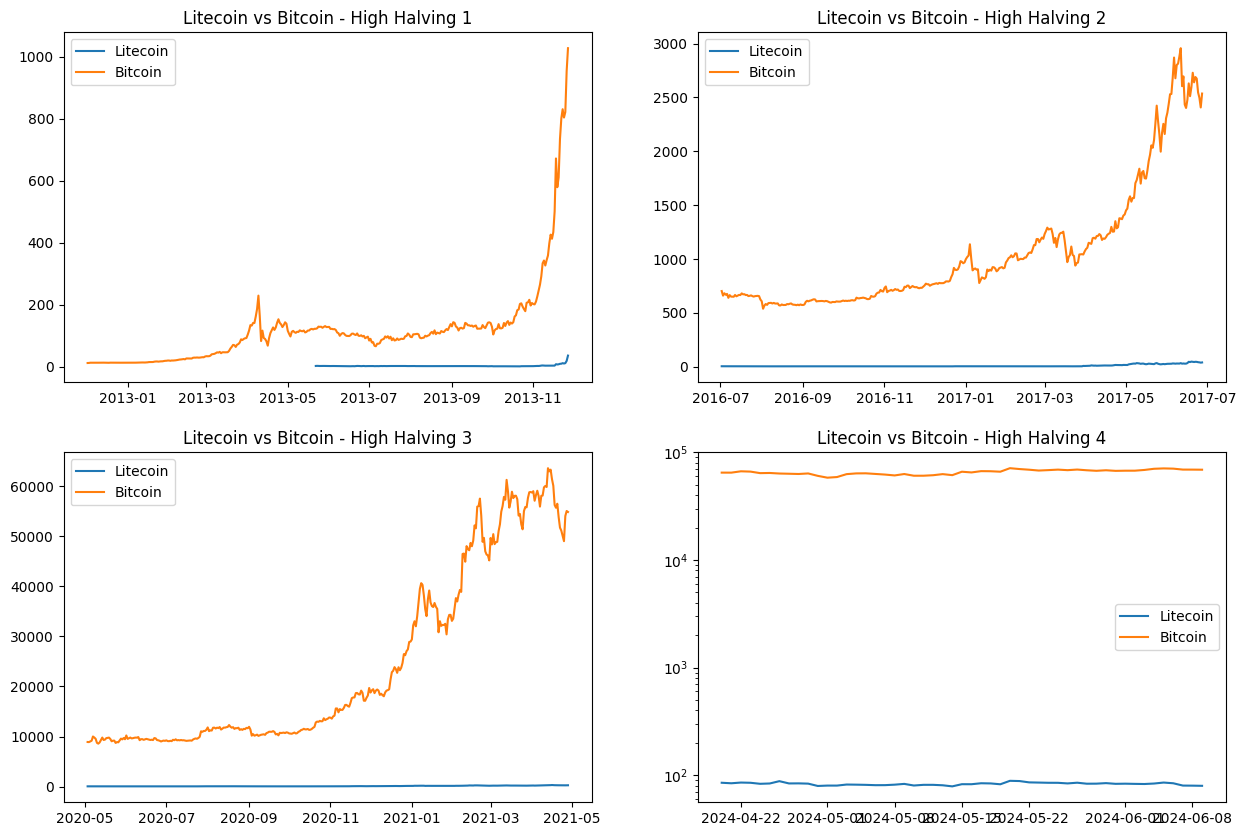

In [323]:
plot_by_coins_and_halving("Litecoin","Bitcoin")

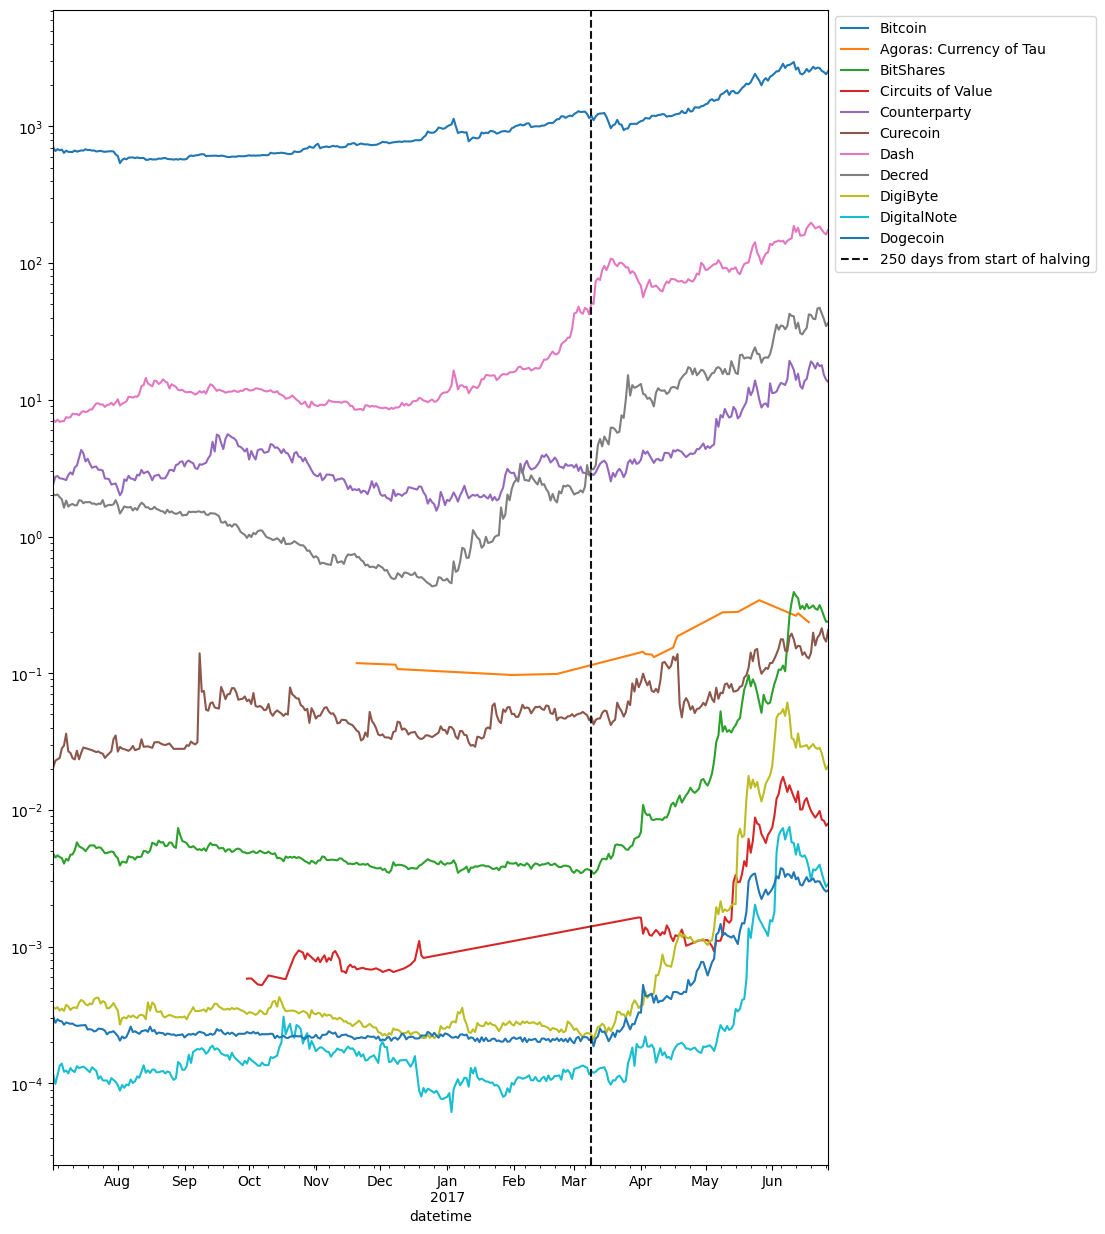

In [324]:
def plot_by_halving(halving: pd.DataFrame, always_show_coin: str = "Bitcoin", limit_coins: int = 10):
    plt.figure(figsize=(10, 15))
    ax = plt.gca()
    ax.set_yscale('log')

    # Encuentra la fecha mínima (inicio) entre todos los grupos
    start_date = halving.index.min()
    # Calcula la fecha objetivo sumando 250 días a la fecha de inicio
    target_date = start_date + pd.DateOffset(days=250)

    # Extrae y plotea el grupo para la moneda que siempre se debe mostrar
    always_show_group = halving[halving['name'] == always_show_coin]
    if not always_show_group.empty:
        always_show_group.sort_index().plot.line(y="close", label=always_show_coin, ax=ax)

    # Inicializa un contador para los grupos
    counter = 0
    for name, group in halving.groupby("name"):
        if name != always_show_coin:  # Evita incluir la moneda que ya se ha ploteado
            if counter < limit_coins:  # Verifica si aún no se ha alcanzado el límite
                sorted_group = group.sort_index()
                sorted_group.plot.line(y="close", label=name, ax=ax)
                counter += 1  # Incrementa el contador
            else:
                break  # Sale del bucle una vez que se alcanza el límite de monedas

    # Trazar una línea vertical en la fecha objetivo
    ax.axvline(x=target_date, color='#111', linestyle='--', label='250 days from start of halving')

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
# Asumiendo que df_high_halving_2 está definido previamente y correctamente indexado por fecha
plot_by_halving(df_halving_2)

In [4]:
df_years = create_df_years()

In [5]:
df_years.set_index("datetime", inplace=True)

In [50]:
def plot_all_time(coins: pd.DataFrame, min_start_date: str = None, always_show_coin: str = "Bitcoin", limit_coins: int = 10):
    plt.figure(figsize=(10, 15))
    ax = plt.gca()
    ax.set_yscale('log')

    # Filtra las monedas que tienen datos desde antes de la fecha especificada
    if min_start_date is not None:
        min_start_date = pd.to_datetime(min_start_date)
        filtered_coins = coins.groupby('name').filter(lambda x: x.index.min() < min_start_date)
    else:
        filtered_coins = coins

    # Calcula la fecha objetivo sumando 250 días a la fecha de inicio de los halvings
    first_halving = pd.to_datetime("2024-03-13") 
    second_halving = pd.to_datetime(HALVINGS_DATE[1]) 
    third_halving = pd.to_datetime(HALVINGS_DATE[2])
    fourth_halving = pd.to_datetime(HALVINGS_DATE[3]) 
    
    # Extrae y plotea el grupo para la moneda que siempre se debe mostrar
    always_show_group = filtered_coins[filtered_coins['name'] == always_show_coin]
    if not always_show_group.empty:
        always_show_group.sort_index().plot.line(y="close", label=always_show_coin, ax=ax)

    # Inicializa un contador para los grupos
    counter = 0
    for name, group in filtered_coins.groupby("name"):
        if name != always_show_coin:  # Evita incluir la moneda que ya se ha ploteado
            if counter < limit_coins:  # Verifica si aún no se ha alcanzado el límite
                sorted_group = group.sort_index()
                sorted_group.plot.line(y="close", label=name, ax=ax)
                counter += 1  # Incrementa el contador
            else:
                break  # Sale del bucle una vez que se alcanza el límite de monedas

    # Trazar una línea vertical en la fecha objetivo de los halvings
    ax.axvline(x=first_halving, color='#111', linestyle='--', label='First_halving')
    ax.axvline(x=first_halving + pd.DateOffset(days=250), color='red', linestyle='--', label='250 days from the first_halving')
    ax.axvline(x=second_halving, color='#111', linestyle='--', label='Second_halving')
    ax.axvline(x=second_halving + pd.DateOffset(days=250), color='red', linestyle='--', label='250 days from the second_halving')
    
    ax.axvline(x=third_halving, color='#111', linestyle='--', label='Third_halving')
    ax.axvline(x=third_halving + pd.DateOffset(days=250), color='red', linestyle='--', label='250 days from the third_halving')
    ax.axvline(x=fourth_halving, color='#111', linestyle='--', label='Fourth_halving')
    ax.axvline(x=fourth_halving + pd.DateOffset(days=250), color='red', linestyle='--', label='250 days from the fourth_halving')

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

C:\Users\pms_l\AppData\Local\Temp\ipykernel_62364\256165070.py:17: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  fourth_halving = pd.to_datetime(HALVINGS_DATE[3])


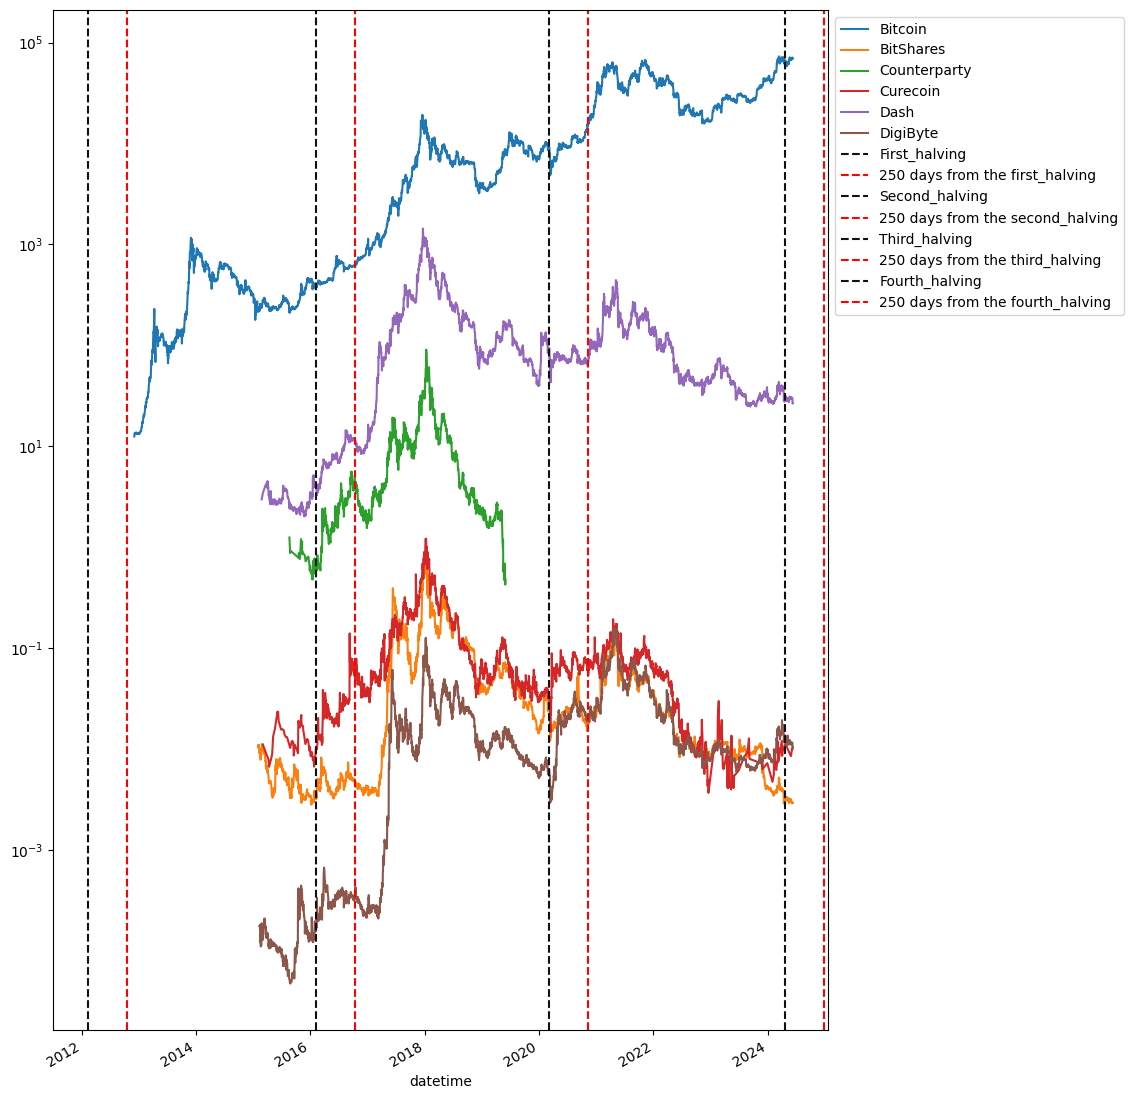

In [328]:
plot_all_time(df_years,limit_coins=5,min_start_date=HALVINGS_DATE[1])

# Creamos el dataset para el entrenamiento

In [6]:
# Cargamos la informacion de las monedas actualmente
df_coins: pd.DataFrame = pd.read_json('../../datasets/json/coins_front.json', orient='records')

In [7]:
coins_names = df_coins["name"].unique()
coins_names

array(['Bitcoin', 'Ethereum', 'Tether', ..., 'HaloDAO', 'Onespace',
       'Artery'], dtype=object)

In [8]:
df_coins_group = df_years.groupby("name")

In [9]:
# fitler df_coins_group by coins_names
df_coins_group = df_coins_group.filter(lambda x: x["name"].iloc[0] in coins_names)
coins_names = df_coins_group["name"].unique()
coins_names

array(['Bitcoin', 'Litecoin', 'Dogecoin', ..., 'Groyper', 'BitcoinBam',
       'Samurai Cat'], dtype=object)

In [10]:
# now fitler df_coins by coins_names
df_coins = df_coins[df_coins["name"].isin(coins_names)]
# save
df_coins.to_json("../../datasets/json/coins_front.json", orient="records")

In [266]:
#TODO Mover esta vaina a otro lado
def get_coins_interval(start: str, end: str, df):
    days_past = 0
    new_df = pd.DataFrame()
    for _, group in df:
        new_group = group[(group.index >= get_datetime(start) - timedelta(days_past)) & (group.index <= get_datetime(end) + timedelta(45)) & (group.index.min() <= pd.to_datetime(start))]
        new_df = pd.concat([new_df, new_group])
    return new_df.sort_index()

In [12]:
# save df_coins_group
df_coins_group.to_json("../../datasets/json/historical.json", orient="records")

In [13]:
df_coins_group= df_coins_group.groupby("name")

create dataset supervised

In [23]:
HALVINGS_DATE

['2/12/2012', '2/07/2016', '3/05/2020', '20/04/2024']

In [267]:
test = get_coins_interval(HALVINGS_DATE[2],HALVINGS_DATE[3],df_coins_group)

In [268]:
test["name"].unique().__len__()

223

C:\Users\pms_l\AppData\Local\Temp\ipykernel_48156\909846253.py:17: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  fourth_halving = pd.to_datetime(HALVINGS_DATE[3])


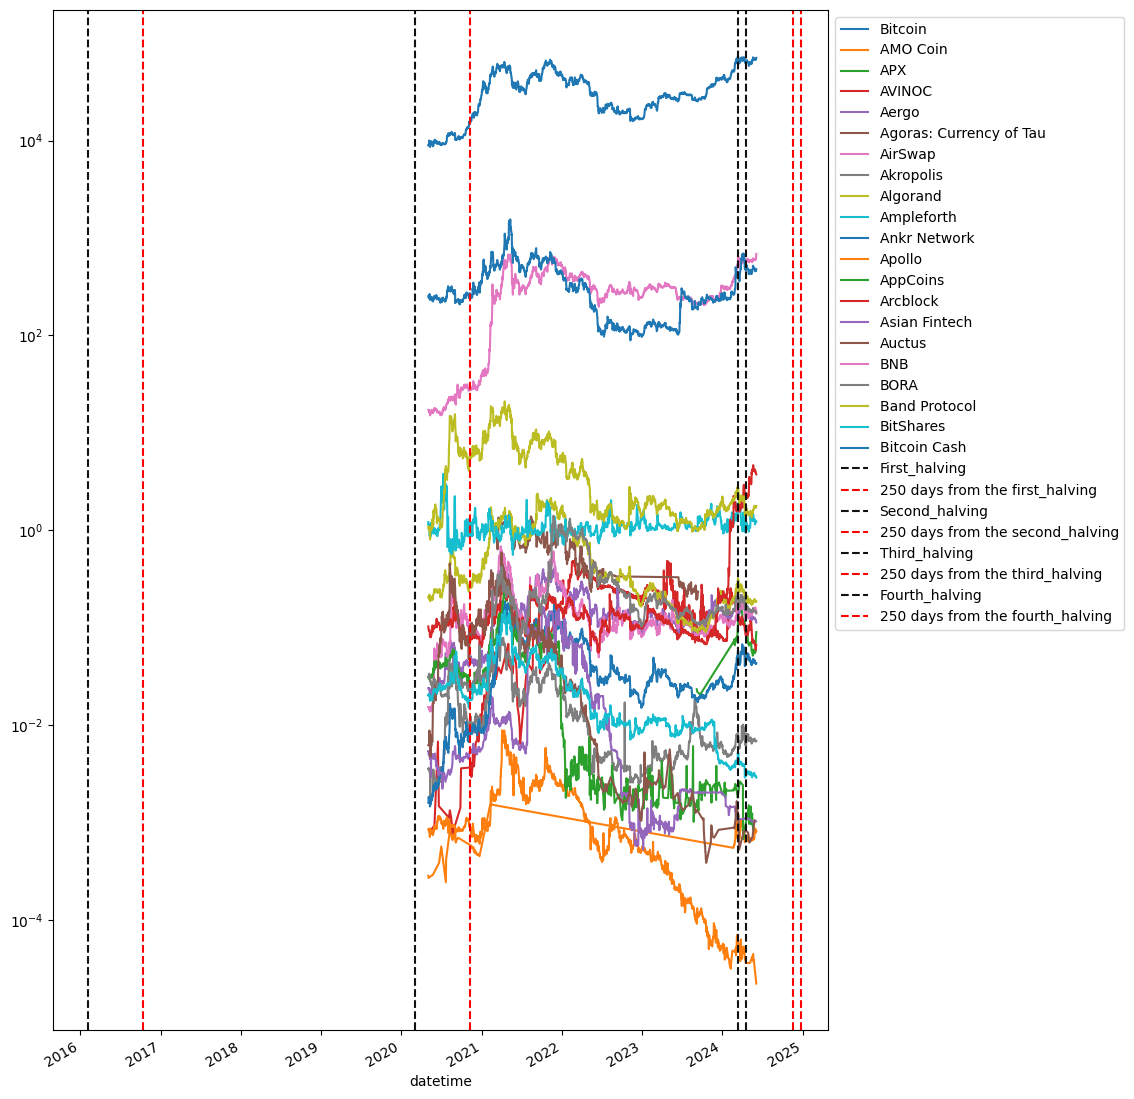

In [269]:
plot_all_time(test,limit_coins=20)

In [197]:
def calculate_sharper(df):
    return (df['log_return'].mean() / df['log_return'].std()) * np.sqrt(252)  # Ajustado para anualización

def calculate_rsi(series, period=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

def calculate_macd(df, slow=26, fast=12, signal=9):
    df['ema_slow'] = df['close'].ewm(span=slow, adjust=False).mean()
    df['ema_fast'] = df['close'].ewm(span=fast, adjust=False).mean()
    df['macd'] = df['ema_fast'] - df['ema_slow']
    df['signal'] = df['macd'].ewm(span=signal, adjust=False).mean()
    return df['macd'] - df['signal']

In [270]:
bitcoin_data = test.groupby("name").get_group("Bitcoin")

In [271]:
test

,id,serialId,symbol,name,slug,open,high,low,close,volume
datetime,,,,,,,,,,
2020-05-03,ce222383-2753-44d4-b9ef-2dd67a7ea730,349,VET,VeChain,vechain,0.004523,0.004598,0.004251,0.004330,3.124343e+07
2020-05-03,1c7fafc5-eee5-46c9-aca2-1f3d70cec523,6,TKN,Monolith,tokencard-1,0.131230,0.131230,0.131230,0.131230,2.410863e+01
2020-05-03,399cf84d-ebc7-478e-b3e1-6c94189ef3c1,14434,OST,OST,simple-token,0.007362,0.007840,0.007166,0.007393,3.394442e+05
2020-05-03,d0e14c70-c724-4832-bcae-876be4dc7de5,6122,BTG,Bitcoin Gold,bitcoin-gold,10.217183,10.647064,9.756335,9.935295,5.671542e+06
2020-05-03,2749bf02-c5c8-4829-a127-b036e2672041,6157,KAVA,Kava,kava,0.601992,0.607628,0.564031,0.573937,2.504434e+06
...,...,...,...,...,...,...,...,...,...,...
2024-06-04,007fe708-6ace-499b-a999-dcaa45e0eaf5,431,ZIL,Zilliqa,zilliqa,0.023144,0.023715,0.022832,0.023595,1.077805e+07
2024-06-04,defa1982-4fd3-4581-bb70-9018542eb706,1114,DAD,DAD,dad,0.006909,0.007088,0.006909,0.007025,2.281539e+04
2024-06-04,e0e44cb4-fbcf-4337-8414-927ee9be468d,15235,APM,apM Coin,apm-coin,0.006430,0.006970,0.006299,0.006641,5.948784e+05


In [273]:
bitcoin_data[:int(bitcoin_data.shape[0] * 0.25)]

,id,serialId,symbol,name,slug,open,high,low,close,volume
datetime,,,,,,,,,,
2020-05-03,1e31218a-e44e-4285-820c-8282ee222035,6057,BTC,Bitcoin,bitcoin,8982.252167,9192.434768,8735.985459,8903.473388,1.085643e+10
2020-05-04,1e31218a-e44e-4285-820c-8282ee222035,6057,BTC,Bitcoin,bitcoin,8900.838434,8967.727915,8542.473781,8885.202770,1.054442e+10
2020-05-05,1e31218a-e44e-4285-820c-8282ee222035,6057,BTC,Bitcoin,bitcoin,8879.734149,9123.978316,8787.189730,9029.783512,1.035469e+10
2020-05-06,1e31218a-e44e-4285-820c-8282ee222035,6057,BTC,Bitcoin,bitcoin,9033.204747,9403.033220,8927.800276,9158.546205,1.101793e+10
2020-05-07,1e31218a-e44e-4285-820c-8282ee222035,6057,BTC,Bitcoin,bitcoin,9156.509621,10055.114380,9072.629179,9999.915355,1.383541e+10
...,...,...,...,...,...,...,...,...,...,...
2021-05-06,1e31218a-e44e-4285-820c-8282ee222035,6057,BTC,Bitcoin,bitcoin,57490.347767,58389.295105,55352.267094,56420.405857,8.361678e+10
2021-05-07,1e31218a-e44e-4285-820c-8282ee222035,6057,BTC,Bitcoin,bitcoin,56434.594766,58674.780694,55338.910196,57406.826290,8.206879e+10
2021-05-08,1e31218a-e44e-4285-820c-8282ee222035,6057,BTC,Bitcoin,bitcoin,57376.465157,59540.575054,56992.447829,58933.583960,6.858255e+10


In [274]:
import numpy as np
delete_cols = ["id", "serialId", "symbol", "slug"]
size = .25

def get_group_features(name: str, group: pd.DataFrame, times:int):
    features = {}
    df = group.copy()
    # preprocess
    df = df.drop(delete_cols, axis=1)  # delete cols unnecessary
    # split data (0.30)
    df_train = df[:int(df.shape[0] * size)]
    df_test = df[int(df.shape[0] * size):]
    # feature engineering
    features["name"] = name
    df_train['log_return'] = np.log(df_train['close'] / df_train['close'].shift(1))
    features["sharper"] = calculate_sharper(df_train)
    df_train['volatility'] = (df_train['high'] - df_train['low']) / df_train['low']
    features['volatility'] = df_train['volatility'].mean()
    features['log_return'] = df_train['log_return'].mean()
    features['mean_close'] = df_train['close'].mean()
    features['std_close'] = df_train['close'].std()
    features['max_close'] = df_train['close'].max()
    features['min_close'] = df_train['close'].min()
    features['mean_volume'] = df_train['volume'].mean()
    features['std_volume'] = df_train['volume'].std()
    df_train['rsi'] = calculate_rsi(df_train['close'])
    features['mean_rsi'] = df_train['rsi'].mean()
    features['std_rsi'] = df_train['rsi'].std()
    df_train['macd'] = calculate_macd(df_train)
    features['mean_macd'] = df_train['macd'].mean()
    features['std_macd'] = df_train['macd'].std()
    # label
    features['willGrow'] = int(df_test['close'].max() >= df_train['close'].min() * times)
    return pd.DataFrame(features, index=[0])

In [275]:
def get_df_supervised(df_group, timesGrow: int):
    new_df = pd.DataFrame()
    for name, group in df_group:
        new_row = get_group_features(name, group, timesGrow)
        new_df = pd.concat([new_df, new_row])
    return new_df

In [ ]:
test_df = get_df_supervised(test.groupby("name"), 10)

In [279]:
test_df["willGrow"].value_counts()

willGrow
1    150
0     73
Name: count, dtype: int64

In [352]:
test_df.shape[0]

223

In [369]:
test_df.iloc[[40]]

,name,sharper,volatility,log_return,mean_close,std_close,max_close,min_close,mean_volume,std_volume,mean_rsi,std_rsi,mean_macd,std_macd,willGrow
0,Cindicator,1.255441,0.413749,0.006264,0.014117,0.011036,0.052271,0.003855,522272.48239,1.484470e+06,53.918715,13.953264,-0.000017,0.000473,1


In [367]:
# get index of pos 40
test_df.iloc[40]

name               Cindicator
sharper              1.255441
volatility           0.413749
log_return           0.006264
mean_close           0.014117
std_close            0.011036
max_close            0.052271
min_close            0.003855
mean_volume      522272.48239
std_volume     1484470.107047
mean_rsi            53.918715
std_rsi             13.953264
mean_macd           -0.000017
std_macd             0.000473
willGrow                    1
Name: 0, dtype: object

In [280]:
# save dataset supervised
test_df.to_json("../../datasets/json/supervised_2.json", orient="records")

In [349]:
pd.to_datetime(1719366696)

Timestamp('1970-01-01 00:00:01.719366696')

# CREar otro nueva data set

In [281]:
def calculate_levelup(v1: float, v2: float) -> float:
    if v1 == 0 or v2 == 0:
        return 0.0
    return float((v2 - v1) / v1)

In [296]:
def get_data_dates(group: pd.DataFrame, MD: int, ED: int):
    start_date = group.index.min()
    middle_date = start_date + pd.DateOffset(days=MD)
    
    end_date = start_date + pd.DateOffset(days=ED)
    if not (end_date in group.index):
        end_date = 0
    start = -1 if not start_date else group.loc[[start_date]].close.values[0]
    middle = 0 if not middle_date else group.loc[[middle_date]].close.values[0]
    end = 0 if not end_date else group.loc[[end_date]].close.values[0]
    return (
        start,
        middle,
        end,
    )

In [297]:
def create_data(group:pd.DataFrame, MD: int, ED: int) -> dict:
    h_start, h_md, h_ed = get_data_dates(group, MD, ED)
    new_halving = {
        "h_start": h_start,
        f"h_{MD}d": h_md,
        f"h_{ED}d": h_ed,
        f"h_{MD}d_change": calculate_levelup(h_start, h_md),
        f"h_{ED}d_change": calculate_levelup(h_start, h_ed),
        "h_max": group.close.max(),
    }
    return new_halving

In [343]:
def get_flag(group: pd.DataFrame):
    start_date = group.index.min()
    h_start_price = group.loc[[start_date]].close.values[0]
    h_max_price = group[ (group.index >= start_date + timedelta(120))].close.max()
    if(h_max_price/h_start_price) > 2.0:
        return 1 # Flag 1 -> 10x
    return 0 # Flag 0 -> No 10x

In [346]:
def create_supervised_dataset(df_group) -> pd.DataFrame:
    data = []
    # variables
    MD = 60  
    ED = 120  
    for name, group in df_group:
        h = create_data(group,MD, ED)

        new_coin = {
            "name": name,
            # Halving 2016
            "h_start": h["h_start"],
            f"h_{MD}d": h[f"h_{MD}d"],
            f"h_{MD}d_change": h[f"h_{MD}d_change"],
            f"h_{ED}d": h[f"h_{ED}d"],
            f"h_{ED}d_change": h[f"h_{ED}d_change"],
            "h_max": h["h_max"],
            # Flag
            "flag": get_flag(group)
        }
        data.append(new_coin)
        # add to the df
    df = pd.DataFrame(data)
    return df

df_test_3 = create_supervised_dataset(df_coins_group)

In [348]:
df_test_3.to_json('./datasets/supervised_dataset_3.json', orient='records')

In [347]:
df_test_3.flag.value_counts()

flag
0    1227
1     834
Name: count, dtype: int64

In [345]:
df_test_3

,name,h_start,h_60d,h_60d_change,h_120d,h_120d_change,h_max,flag
0,0x0.ai: AI Smart Contract,0.000071,0.006704,93.420219,0.058722,826.062446,0.487685,1
1,0xBlack,0.000612,0.000322,-0.474006,0.000000,0.000000,0.000810,0
2,0xFair,0.001564,0.000547,-0.650338,0.000000,0.000000,0.008289,0
3,1ex,0.061429,0.000000,0.000000,0.000000,0.000000,0.083596,0
4,1inch,2.294162,3.678071,0.603231,3.953284,0.723193,7.489723,1
...,...,...,...,...,...,...,...,...
2056,xWIN Finance,0.803825,0.699272,-0.130070,0.563325,-0.299195,0.803825,0
2057,yearn.finance,369.146991,34884.580440,93.500514,17625.311288,46.746052,82924.082581,1
2058,zkSwap Finance,0.062160,0.051075,-0.178338,0.000000,0.000000,0.062160,0
2059,zkSync id,0.054514,0.039591,-0.273744,0.000000,0.000000,0.058305,0


In [293]:
df_coins_group.get_group("Bitcoin")

,id,serialId,symbol,name,slug,open,high,low,close,volume
datetime,,,,,,,,,,
2013-10-21,1e31218a-e44e-4285-820c-8282ee222035,6057,BTC,Bitcoin,bitcoin,184.229754,195.180881,166.070000,184.776243,1.005583e+07
2013-10-20,1e31218a-e44e-4285-820c-8282ee222035,6057,BTC,Bitcoin,bitcoin,175.890047,185.970038,162.715354,182.903664,2.846673e+06
2013-10-19,1e31218a-e44e-4285-820c-8282ee222035,6057,BTC,Bitcoin,bitcoin,165.311740,192.000000,150.615221,166.399814,1.320684e+07
2013-10-18,1e31218a-e44e-4285-820c-8282ee222035,6057,BTC,Bitcoin,bitcoin,152.496887,168.016387,143.371234,162.191031,7.529209e+06
2013-10-17,1e31218a-e44e-4285-820c-8282ee222035,6057,BTC,Bitcoin,bitcoin,139.544992,159.078843,135.005921,143.942077,4.545745e+06
...,...,...,...,...,...,...,...,...,...,...
2023-10-09,1e31218a-e44e-4285-820c-8282ee222035,6057,BTC,Bitcoin,bitcoin,27931.831662,27994.116027,27289.619243,27595.424120,7.136516e+09
2023-10-08,1e31218a-e44e-4285-820c-8282ee222035,6057,BTC,Bitcoin,bitcoin,27974.993362,28104.432929,27738.446430,27933.580154,4.291528e+09
2023-10-07,1e31218a-e44e-4285-820c-8282ee222035,6057,BTC,Bitcoin,bitcoin,27946.925239,28035.016278,27867.896670,27977.623341,3.528814e+09


In [292]:
df_test_3

,name,h_start,h_120d,h_120d_change,h_240d,h_240d_change,h_max,flag
43,Aergo,0.023928,0.062515,1.612662,0.039255,0.640577,0.473379,1
51,AirSwap,0.015311,0.191798,11.527175,0.067895,3.434504,1.801255,1
54,Akropolis,0.003554,0.029972,7.434186,0.009217,1.593746,0.078743,1
63,Algorand,0.205744,0.502288,1.441324,0.346361,0.683456,3.151165,1
78,Ampleforth,1.212226,2.218108,0.829781,0.985904,-0.186700,3.791107,0
...,...,...,...,...,...,...,...,...
1997,Zilliqa,0.006052,0.022430,2.706013,0.084447,12.952948,0.236924,1
2004,aelf,0.072142,0.136677,0.894560,0.107077,0.484251,2.417510,1
2006,apM Coin,0.113361,0.075683,-0.332371,0.013170,-0.883824,0.984185,1
2016,district0x,0.004280,0.016084,2.758355,0.047920,10.197604,0.403015,1


# Creamos un nuevo dataset

In [6]:
import random

In [7]:
market_data = pd.read_json("./datasets/market_data.json", orient="records")
market_data.set_index("datetime", inplace=True)

In [8]:
market_data[:1]

,id,serialId,symbol,name,slug,open,high,low,close,volume
datetime,,,,,,,,,,
2013-10-21,1e31218a-e44e-4285-820c-8282ee222035,6057,BTC,Bitcoin,bitcoin,184.229754,195.180881,166.07,184.776243,1.005583e+07


Creamos el dataset para servir al front

In [2]:
metadata_coin = read_json("../../datasets/json/coins_clean.json")
response = fetch_data(APIS.MESSARI,"marketdata/v1/assets/ath",{})

In [3]:
def add_id_messari(messari_coins:list,coinmarket_coins:list):
    names_coins = set(list(map(lambda x: x["name"],messari_coins)))
    map_coins = {}
    for coin in messari_coins:
        map_coins[coin["name"]] = coin["id"]
    new_df = []
    for coin in coinmarket_coins:
        if(coin["name"] in names_coins):
            new_coin = coin.copy()
            new_coin["id"] = map_coins[coin["name"]]
            new_df.append(new_coin)
    return new_df
        
coins_front = add_id_messari(response["data"],metadata_coin)

In [5]:
coins_front.__len__()

4900

In [6]:
# delete coins repeated by name
coins_front = list({v['name']:v for v in coins_front}.values())

In [7]:
coins_front.__len__()

2068

In [8]:
save_json(coins_front, "../../datasets/json/coins_front.json")

In [22]:
df_test = get_coins_interval(HALVINGS_DATE[1], HALVINGS_DATE[3], market_data)
df_test

,id,serialId,symbol,name,slug,open,high,low,close,volume
datetime,,,,,,,,,,
2016-02-07,c7c3697d-1b9c-42bf-9664-a366634ce2b3,6093,LTC,Litecoin,litecoin,3.071417,3.126422,3.035030,3.083659,5.576678e+07
2016-02-07,7d793fa7-5fc6-432a-b26b-d1b10769d42e,91,DOGE,Dogecoin,dogecoin,0.000302,0.000307,0.000273,0.000279,8.522124e+04
2016-02-07,2cffe1ba-a84e-479c-92c3-ab20bf775c4d,1355,PPC,Peercoin,peercoin,0.407586,0.418798,0.407586,0.410808,6.012067e+01
2016-02-07,3e6d2d8e-b4c8-4738-837c-bc29d948fc7c,94,DGB,DigiByte,digibyte,0.000169,0.000186,0.000161,0.000169,9.466082e+03
2016-02-07,83e4940c-70ba-4a6e-856b-686b6f9c487e,5898,XEM,NEM,new-economy-movement,0.000621,0.000641,0.000580,0.000608,8.533833e+03
...,...,...,...,...,...,...,...,...,...,...
2024-04-20,ea17223b-3317-44f2-ad05-a2640904b886,553,SC,Siacoin,siacoin,0.006958,0.007485,0.006897,0.007426,7.087913e+06
2024-04-20,e6702473-8eb4-4188-ba5b-338bf8b2398f,100,DASH,Dash,dash,29.600826,31.538458,29.322305,31.508878,1.439712e+07
2024-04-20,e8be3ffe-8ad9-46e0-ba96-3c5d9ffe5251,383,XDN,DigitalNote,digitalnote,0.000023,0.000024,0.000023,0.000024,9.201919e+01


In [23]:
CATEGORICAL_COLS = df_test.select_dtypes(include=['object']).columns
NUMERIC_COLS =df_test.select_dtypes(include=['float64', 'int64']).columns
COLUMNS = ["open", "high", "low", "close", "volume"]

In [34]:
def inject_behaviour(coin: pd.DataFrame, bitcoin: pd.DataFrame):
    new_coin = coin.copy()
    bitcoin["datetime"] = bitcoin.index
    bitcoin.to_json('./datasets/bitcoin.json', orient='records')
    del bitcoin["datetime"]
    bitcoin.drop(columns= CATEGORICAL_COLS, inplace=True)
    bitcoin.drop(columns= NUMERIC_COLS[0], inplace=True)
    # Change name for the columns
    bitcoin.columns = list(map(lambda x: f"bitcoin_{x}", bitcoin.columns))
    
    # merge on the index
    new_coin = pd.merge(new_coin, bitcoin, on="datetime", how="inner")
    return new_coin

In [35]:
def get_coin(df: pd.DataFrame):
    new_df = df.groupby("name")
    coins_names = list(new_df.groups.keys())
    coin = new_df.get_group(random.choice(coins_names))
    bitcoin = new_df.get_group("Bitcoin")

    coin = inject_behaviour(coin,bitcoin)
    return coin,bitcoin

In [ ]:
coin,bitcoin = get_coin(df_test)

In [37]:
coin

,id,serialId,symbol,name,slug,open,high,low,close,volume,bitcoin_open,bitcoin_high,bitcoin_low,bitcoin_close,bitcoin_volume
datetime,,,,,,,,,,,,,,,
2016-02-07,3e6d2d8e-b4c8-4738-837c-bc29d948fc7c,94,DGB,DigiByte,digibyte,0.000169,0.000186,0.000161,0.000169,9.466082e+03,376.030182,382.416109,372.510785,376.678016,4.532929e+08
2016-02-08,3e6d2d8e-b4c8-4738-837c-bc29d948fc7c,94,DGB,DigiByte,digibyte,0.000166,0.000178,0.000163,0.000171,5.863766e+03,377.824362,382.104274,371.106554,373.071537,4.539467e+08
2016-02-09,3e6d2d8e-b4c8-4738-837c-bc29d948fc7c,94,DGB,DigiByte,digibyte,0.000172,0.000183,0.000164,0.000169,4.269864e+03,374.366660,377.633699,371.134725,374.419881,4.221380e+08
2016-02-10,3e6d2d8e-b4c8-4738-837c-bc29d948fc7c,94,DGB,DigiByte,digibyte,0.000165,0.000173,0.000161,0.000172,2.752198e+03,375.245206,385.045611,373.279047,380.798141,6.877410e+08
2016-02-11,3e6d2d8e-b4c8-4738-837c-bc29d948fc7c,94,DGB,DigiByte,digibyte,0.000168,0.000186,0.000161,0.000178,1.673715e+04,380.679593,384.303153,373.702775,379.643758,4.435501e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-16,3e6d2d8e-b4c8-4738-837c-bc29d948fc7c,94,DGB,DigiByte,digibyte,0.012834,0.013104,0.011821,0.012517,1.272740e+07,63447.368047,64348.621005,61701.582639,63825.460415,2.857241e+10
2024-04-17,3e6d2d8e-b4c8-4738-837c-bc29d948fc7c,94,DGB,DigiByte,digibyte,0.012516,0.012715,0.011736,0.012248,8.228291e+06,63813.971751,64457.518362,59839.517180,61287.902218,2.900155e+10
2024-04-18,3e6d2d8e-b4c8-4738-837c-bc29d948fc7c,94,DGB,DigiByte,digibyte,0.012232,0.012725,0.011754,0.012567,6.167540e+06,61282.961842,64152.047670,60893.974500,63503.217010,2.383645e+10


In [39]:
# add datetime before
coin["datetime"] = coin.index
coin.to_json('./datasets/coin.json', orient='records')